# Data Basics 

## Reading CSV Files 

In [ ]:
] add DataFrames      # usually not needed

In [ ]:
] add CSV             # usually not needed

In [1]:
using DataFrames

In [2]:
using CSV

In [3]:
df = CSV.File("data/anscombe.csv") |> DataFrame

,x1,x2,x3,x4,y1,y2,y3,y4
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.1,8.84,7.04
7,6,6,6,8,7.24,6.13,6.08,5.25
8,4,4,4,19,4.26,3.1,5.39,12.5
9,12,12,12,8,10.84,9.13,8.15,5.56


In [ ]:
df.x1

In [ ]:
df."x1"     # strange, but sometimes useful 

In [ ]:
df[1:4, :x1]

In [ ]:
select(df, r"x")           # you can make in-place selection using the bang variant of select 

In [ ]:
df

## Descriptive Study

In [ ]:
describe(df)

In [ ]:
describe(df, :mean, :std)

In [ ]:
nrow(df), ncol(df)

In [ ]:
size(df)

In [ ]:
df.id = 1:nrow(df)

In [ ]:
df

We want to find global minimum and maximum for X and Y separately. 

In [ ]:
extrema([ [13, 2, 5, 7] [2, 4, 5, 6]]) 

In [ ]:
select(df, r"x")

In [ ]:
Matrix(select(df, r"x"))

In [ ]:
extrema(Matrix(select(df, r"x")))

In [ ]:
extrema(Matrix(select(df, r"x")))  .+ (-1, 1)

In [4]:
xlim = collect(extrema(Matrix(select(df, r"x")))  .+ (-1, 1))
# turn them to an Array{Int64}

2-element Array{Int64,1}:
  3
 20

In [5]:
ylim = collect(extrema(Matrix(select(df, r"y")))  .+ (-1, 1))

2-element Array{Float64,1}:
  2.1
 13.74

In [ ]:
] add PyPlot

In [ ]:
] add GLM

In [ ]:
using PyPlot

In [ ]:
using GLM

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=4.0)
for i in 1:4
    x = Symbol("x", i)
    y = Symbol("y", i)
    model = lm(term(y)~term(x), df)
    axs[i].plot(xlim, predict(model, DataFrame(x => xlim)), color="orange")
    axs[i].scatter(df[:, x], df[:, y])
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_xlabel("x$i")
    axs[i].set_ylabel("y$i")
    a, b = round.(coef(model), digits=2)
    c = round(100 * r2(model), digits=2)
    axs[i].set_title(string("R²=$c%, $y=$a+$b$x"))
end

In [6]:
using Plots

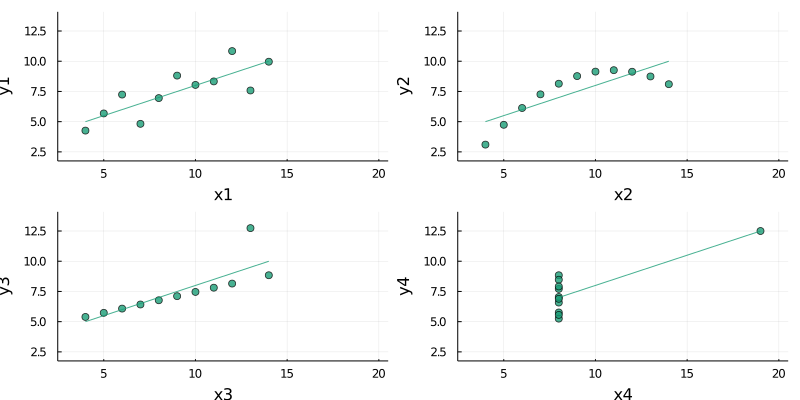

In [7]:
plot_array = Any[]

for i in 1:4    
    x_vals = df[:, "x$i"]
    y_vals = df[:, "y$i"]
    
    p = plot( x_vals, y_vals, 
              seriestype=:scatter, 
              xlabel="x$i", ylabel="y$i",
              xlims=xlim, ylims=ylim, 
              smooth=true,
              opacity=0.8, palette = :Dark2_5, 
            ) 
    
    push!(plot_array, p)
end

plot(plot_array..., layout = (2, 2), legend = false, size = (800, 400))